# TSARNN Homework 2 - Maximilian Rokuss and Julius Meyer-Ohlendorf


### Task 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from sklearn.linear_model import LinearRegression
import scipy.signal
from statsmodels.tsa.stattools import acf, pacf
from sklearn import linear_model
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
location = '/content/drive/MyDrive/Colab Notebooks/TSARNN/TSARNN_Ex2/'
f = open(location + 'Tut2_file1.txt', "r")
#print(f.read())

[-0.16857648  0.56265287  0.1088815  ... 50.45654871 51.18101355
 53.18899827]


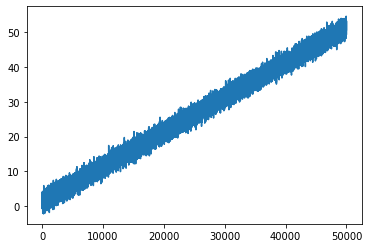

In [ ]:
dict = spio.loadmat(location + 'Tut2_file1.mat')
data1 = dict['x'][0]
print(data1)
plt.plot(data1)

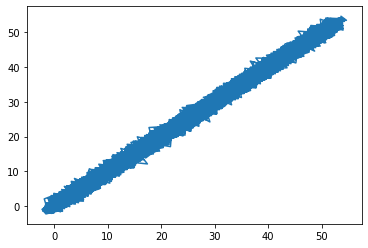

In [ ]:
# For reference: https://realpython.com/linear-regression-in-python/
# Re-shape data

x = data1[0:-1].reshape((-1, 1))
y = data1[1:]

# plot data
plt.plot(x,y)

coefficient of determination: 0.9940612548182461 

a0: 0.07908230173995179 

a1: [0.99702754] 



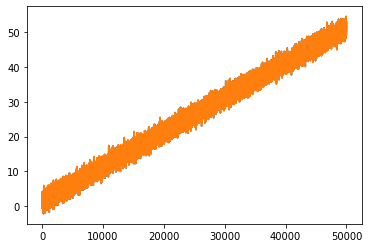

In [ ]:
# Regression

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq,'\n')
print('a0:', model.intercept_,'\n')
print('a1:', model.coef_,'\n')

# Predict response

y_pred = model.predict(x)
#print('predicted response:', y_pred, sep='\n')

plt.plot(data1)
plt.plot(y_pred)

In the case the specific value $a_1 \approx 1 $ is given by the (linear) slope of the process shown in the plot of the re-shaped data. Since we consider an AR(1) process this means that we almost exactly take the previous value and add a constant $a_0$ (and some randomness) on each step. Therefore we yield in a linear slope. Check prediction with ARIMA tool:

In [ ]:
## Check with statsmodel

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

modelAR = ARIMA(data1, order=(1,0,0))
model_fit = modelAR.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                50000
Model:                     ARMA(1, 0)   Log Likelihood              -76462.975
Method:                       css-mle   S.D. of innovations              1.117
Date:                Mon, 23 Nov 2020   AIC                         152931.950
Time:                        11:44:47   BIC                         152958.409
Sample:                             0   HQIC                        152940.238
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.2497      1.695     15.488      0.000      22.928      29.571
ar.L1.y        0.9971      0.000   2902.927      0.000       0.996       0.998
                                    Roots           

The value for $a_1$ is basically the same. The constant cahnges due to the randomnes

b)

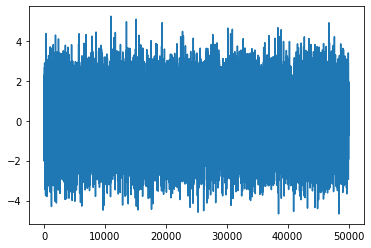

In [ ]:
# Detrend

data1_detrend = scipy.signal.detrend(data1)
plt.plot(data1_detrend)

coefficient of determination: 0.36347518018891356 

a0: 5.1685112844882856e-05 

a1: [0.60289581] 

predicted response:
[-0.85235859 -0.41210641 -0.68628621 ... -1.1654965  -0.47578087
 -0.03960699]


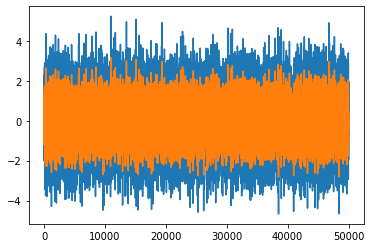

In [ ]:
x = data1_detrend[0:-1].reshape((-1, 1))
y = data1_detrend[1:]

# Regression

model2 = LinearRegression().fit(x, y)

r_sq = model2.score(x, y)
print('coefficient of determination:', r_sq,'\n')
print('a0:', model2.intercept_,'\n')
print('a1:', model2.coef_,'\n')

# Predict response

y_pred2 = model2.predict(x)
print('predicted response:', y_pred2, sep='\n')

# Plot detrend and prediction

plt.plot(data1_detrend)
plt.plot(y_pred2)

In [ ]:
## Check with statsmodel

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

modelAR = ARIMA(data1_detrend, order=(1,0,0))
model_fit = modelAR.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                50000
Model:                     ARMA(1, 0)   Log Likelihood              -70963.558
Method:                       css-mle   S.D. of innovations              1.000
Date:                Mon, 23 Nov 2020   AIC                         141933.116
Time:                        11:48:53   BIC                         141959.575
Sample:                             0   HQIC                        141941.404
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.607e-05      0.011      0.001      0.999      -0.022       0.022
ar.L1.y        0.6029      0.004    168.972      0.000       0.596       0.610
                                    Roots           

One can see that due to the performed detrending the first coefficient of the AR model $a_0$ almost vanishes since the slope is removed and we therefore do not add a constant at each step.

c)

In [ ]:
# generate point which is N steps ahed (up to 5)

def point_in_steps(point,N):
  series = np.zeros(N+1) # [t0 t+1 t+2 t+3 t+4 t+5]
  series[0] = point
  for k in range(N):
    series[k+1]= model.intercept_ + model.coef_*series[k] #+ np.random.normal(0,1.5)
  return series[-1]

Error:  2.1186069490095076


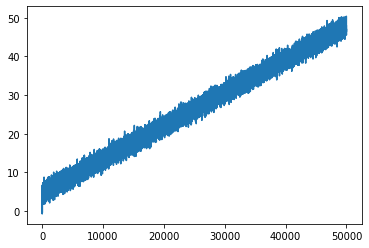

In [ ]:
# generate whole time series with N steps ahead
N = 50
pred_series = np.zeros_like(data1)
pred_series[0:N-1] = data1[0:N-1]
for k in range(N,len(data1)):
  pred_series[k] = point_in_steps(data1[k-N],N)

print("Error: ", np.mean(abs(data1[N:-1]-pred_series[N:-1])))
plt.plot(pred_series)

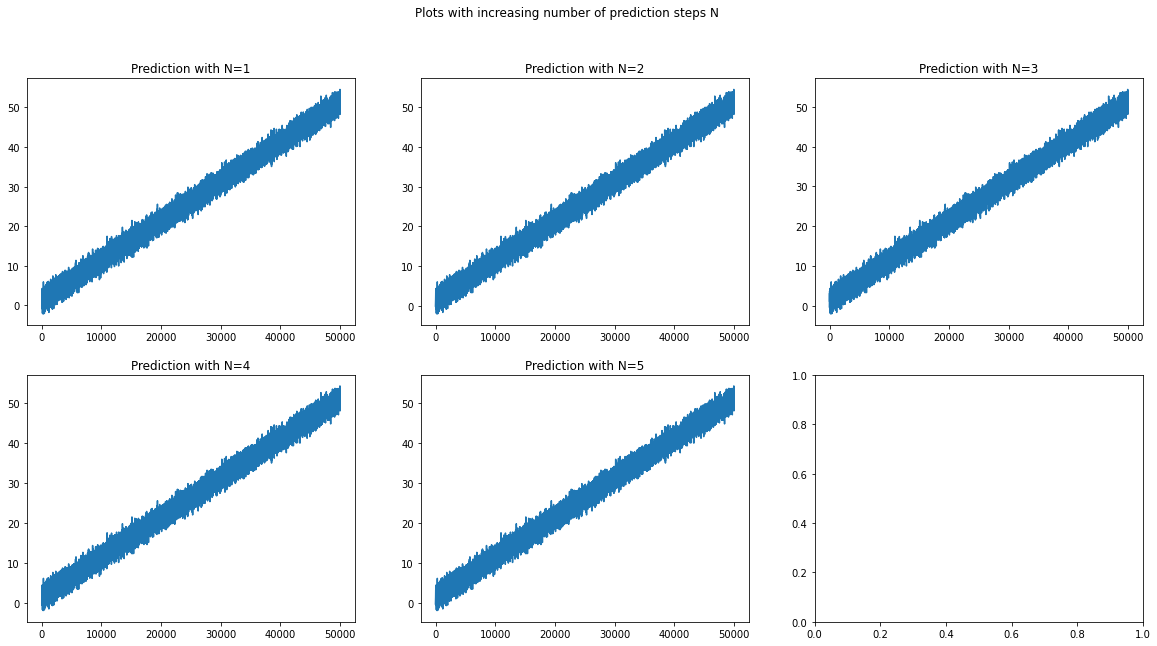

In [ ]:
# Predictions and errors with increasing N
error = np.zeros(5)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.ravel()

for N in range(1,6):
  pred_series = np.zeros_like(data1)
  pred_series[0:N-1] = data1[0:N-1]
  for k in range(N,len(data1)):
    pred_series[k] = point_in_steps(data1[k-N],N)
  error[N-1] = np.mean(abs(data1[N:-1]-pred_series[N:-1]))

  fig.suptitle('Plots with increasing number of prediction steps N')
  ax[N-1].plot(pred_series)
  ax[N-1].set_title('Prediction with N=%i' %N)

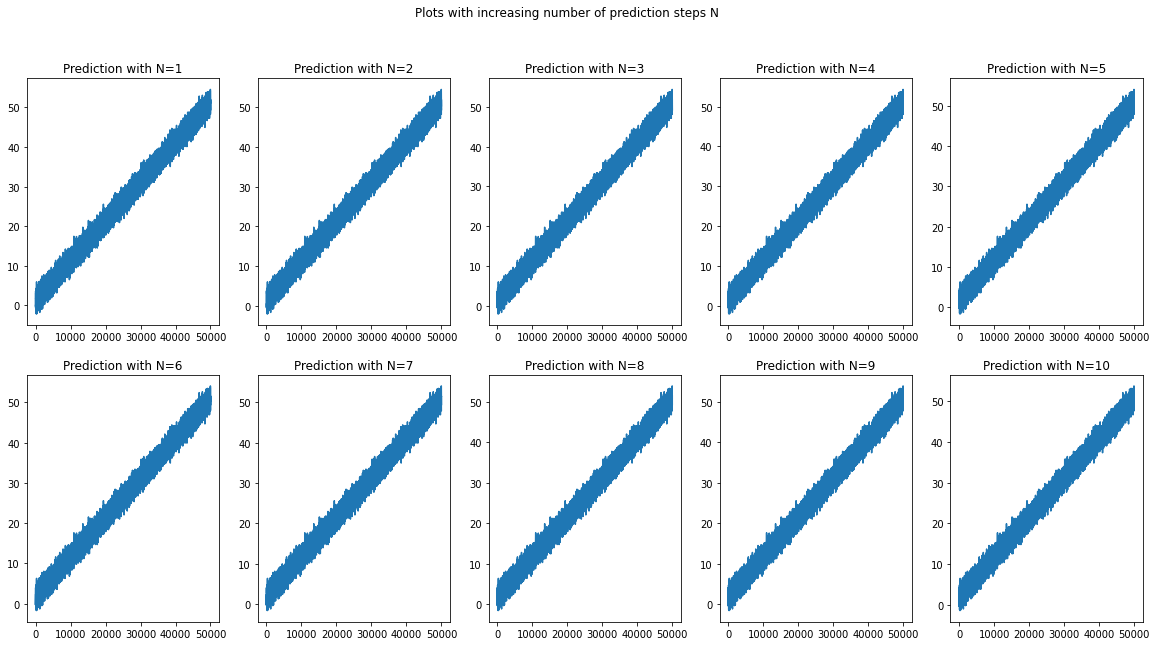

In [ ]:
# Predictions and errors with increasing N
error10 = np.zeros(10)

fig, ax = plt.subplots(2, 5, figsize=(20, 10))
ax = ax.ravel()

for N in range(1,11):
  pred_series = np.zeros_like(data1)
  pred_series[0:N-1] = data1[0:N-1]
  for k in range(N,len(data1)):
    pred_series[k] = point_in_steps(data1[k-N],N)
  error10[N-1] = np.mean(abs(data1[N:-1]-pred_series[N:-1]))

  fig.suptitle('Plots with increasing number of prediction steps N')
  ax[N-1].plot(pred_series)
  ax[N-1].set_title('Prediction with N=%i' %N)

[0.89157916 1.13058725 1.25319775 1.32079244 1.36471991]


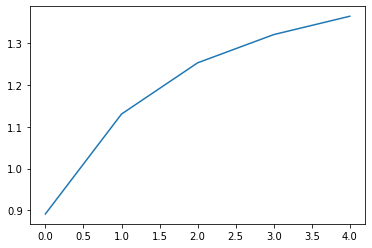

In [ ]:
# plot error for N = 5 (and N=10)
print(error)
plt.plot(error)

[0.89157916 1.13058725 1.25319775 1.32079244 1.36471991 1.38978007
 1.40281742 1.41262779 1.42181792 1.42527066]


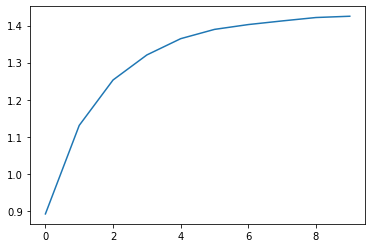

In [ ]:
print(error10)
plt.plot(error10)

In [ ]:
print("Error for one step:", error[0])
print("Error for 5 steps:", error[4])

Error for one step: 0.8915791600600106
Error for 5 steps: 1.3647199123387288


d)

[-4.117096   -1.54256415 -2.66228088 ...  3.96486679  4.71864488
  2.58622357]


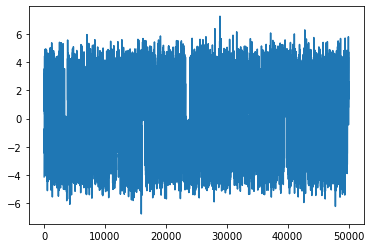

In [ ]:
dict = spio.loadmat(location + 'Tut2_file2.mat')
data2 = dict['x'][0]
print(data2)
plt.plot(data2)

coefficient of determination: 0.762383848007515 

a0: 0.0014164137603712695 

a1: [0.87313166] 



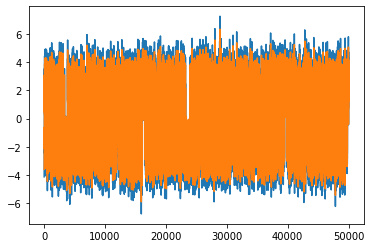

In [ ]:
# Re-shape data

x = data2[0:-1].reshape((-1, 1))
y = data2[1:]

# Regression

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq,'\n')
print('a0:', model.intercept_,'\n')
print('a1:', model.coef_,'\n')

# Predict response

y_pred = model.predict(x)
#print('predicted response:', y_pred, sep='\n')

plt.plot(data2)
plt.plot(y_pred)

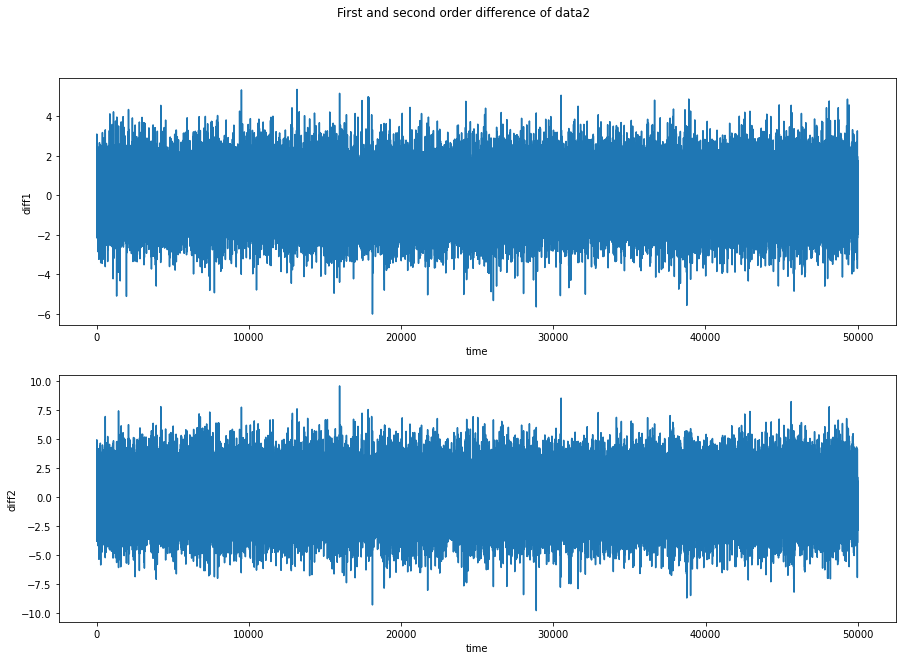

In [ ]:
# Differencing

data2_diff1 = np.diff(data2)
data2_diff2 = np.diff(data2_diff1)

fig, [p1, p2] = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('First and second order difference of data2')
p1.plot(data2_diff1)
p1.set_xlabel('time')
p1.set_ylabel('diff1')
p2.plot(data2_diff2)
p2.set_xlabel('time')
p2.set_ylabel('diff2')

plt.show()

All differences look very stationary

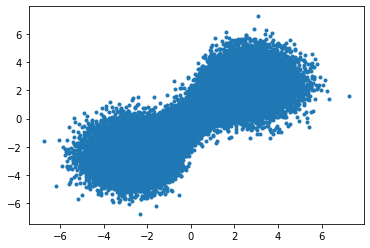

In [ ]:
# First retun map:

plt.plot(x,y,".")

There seem to be 2 prominent clusters.

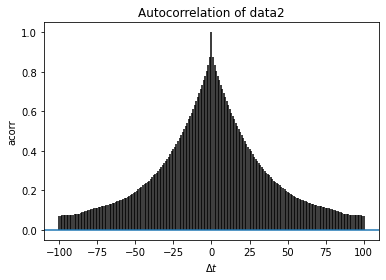

In [ ]:
# Auto correlation

plt.acorr(data2, maxlags=100)
plt.title('Autocorrelation of data2')
plt.xlabel('$\Delta t$')
plt.ylabel('acorr')
plt.show()

The auto correlation does not show any particular correlations for specific timesteps.

A linear time series might be applicable as the accuracy of the model shows however since this looks like a stationary random process with no specific correlation so a simpler model without the dependecy on earlier variables might be applicable too.

### Task 2

Autocorrelation and partial autocorrelation function implemented by ourselves:


In [ ]:
reg = linear_model.LinearRegression()

def acorrfunc(TS, lag):
    '''
    Calculates the autocorrelation of given TS for given time lag
    '''
    N = len(TS)
    TS_lag = TS[lag:]
    TS = TS[0: N - lag]
    mu = np.mean(TS)
    std = np.std(TS)

    gamma = np.sum((TS - mu) * (TS_lag - mu))
    acorr = gamma / ((N - lag) * std**2)

    return(acorr)


def pacorrfunc(TS, lag):
    '''
    Calculates the partial autocorrelation of given TS for given time lag
    '''
    # if lag smaller than 2, the pacorr is given by the acorr
    if lag < 2:
        pacorr = acorrfunc(TS, lag)
        return(pacorr)

    # working with pandas for better handling
    df = pd.DataFrame(TS, columns=['x_i'])
    reg_list = []

    # creating shifted TS
    for k in range(1, lag + 1):
        column = 'x_i-' + str(k)
        df[column] = df['x_i'].shift(k)

        if k < lag:
            reg_list.append(column)

    drop_rows = np.arange(lag)
    df = df.drop(df.index[drop_rows])

    # regression for x_i = a0 + a1 x_i-1 + a2 x_i-2 ... + alag+1 x_i-(lag+1)
    Y = df['x_i']
    X = df[reg_list]
    model = reg.fit(X, Y)
    # residuals
    df['x_i_new'] = Y - reg.predict(X)

    # # regression for x_i-lag = b0 + b1 x_i-(lag+1) + b1 x_i-(lag+2) +...
    Y_column = 'x_i-' + str(lag)
    Y = df[Y_column]
    model = reg.fit(X, Y)
    # residuals
    df[Y_column + '_new'] = Y - reg.predict(X)

    # calculating pacorr value with residual TS of previous regression
    x_new = np.array(df['x_i_new'])
    x_new_lag = np.array(df[Y_column + '_new'])

    mu = np.mean(x_new)
    mu_lag = np.mean(x_new_lag)
    std = np.std(x_new)
    std_lag = np.std(x_new_lag)

    N = len(x_new)
    gamma = np.sum((x_new - mu) * (x_new_lag - mu_lag))
    pacorr = gamma / (N * std * std_lag)

    return(pacorr)

Loading Data and plotting both correlation functions. Results are also compared with built in functions from statsmodels.

For AR process:

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


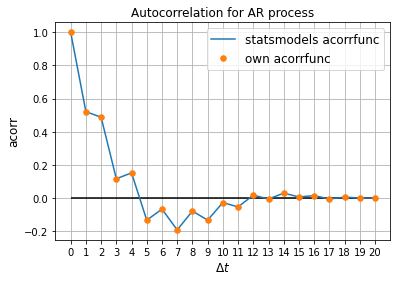

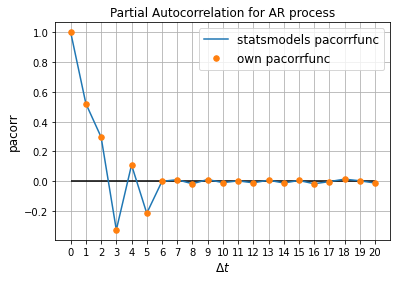

In [ ]:
# loading data
filename = 'Tut2_file3.mat'
mat = spio.loadmat(location + filename)

x_AR = mat['x_AR']
x_AR = x_AR.flatten()
x_MA = mat['x_MA']
x_MA = x_MA.flatten()


lag_max =  20

acorr_AR_arr = []
pacorr_AR_arr = []
acorr_MA_arr = []
pacorr_MA_arr = []

for lag in range(lag_max + 1):

    acorr_AR_arr.append(acorrfunc(x_AR, lag))
    pacorr_AR_arr.append(pacorrfunc(x_AR, lag))
    acorr_MA_arr.append(acorrfunc(x_MA, lag))
    pacorr_MA_arr.append(pacorrfunc(x_MA, lag))


plt.figure(0)
plt.title('Autocorrelation for AR process')
plt.plot(acf(x_AR, nlags=lag_max), label='statsmodels acorrfunc')
plt.plot(acorr_AR_arr, '.', markersize=11, label='own acorrfunc')
plt.hlines(0, 0, lag_max)
plt.xlabel(r'$\Delta t$', fontsize='12')
plt.ylabel('acorr', fontsize='12')
plt.legend(fontsize='12')
plt.xticks(np.arange(0,lag_max+1))
plt.grid()
plt.show()

plt.figure(1)
plt.title('Partial Autocorrelation for AR process')
plt.plot(pacf(x_AR, nlags=lag_max), label='statsmodels pacorrfunc')
plt.plot(pacorr_AR_arr, '.', markersize=11, label='own pacorrfunc')
plt.hlines(0, 0, lag_max)
plt.xlabel(r'$\Delta t$', fontsize='12')
plt.ylabel('pacorr', fontsize='12')
plt.legend(fontsize='12')
plt.xticks(np.arange(0,lag_max+1))
plt.grid()
plt.show()


For MA process

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


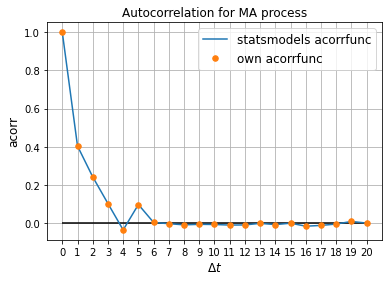

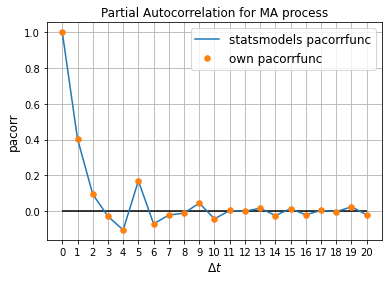

In [ ]:
plt.figure(3)
plt.title('Autocorrelation for MA process')
plt.plot(acf(x_MA, nlags=lag_max), label='statsmodels acorrfunc')
plt.plot(acorr_MA_arr, '.', markersize=11, label='own acorrfunc')
plt.hlines(0, 0, lag_max)
plt.xlabel(r'$\Delta t$', fontsize='12')
plt.ylabel('acorr', fontsize='12')
plt.legend(fontsize='12')
plt.xticks(np.arange(0,lag_max+1))
plt.grid()
plt.show()

plt.figure(4)
plt.title('Partial Autocorrelation for MA process')
plt.plot(pacf(x_MA, nlags=lag_max), label='statsmodels pacorrfunc')
plt.plot(pacorr_MA_arr, '.', markersize=11, label='own pacorrfunc')
plt.hlines(0, 0, lag_max)
plt.xlabel(r'$\Delta t$', fontsize='12')
plt.ylabel('pacorr', fontsize='12')
plt.legend(fontsize='12')
plt.xticks(np.arange(0,lag_max+1))
plt.grid()
plt.show()

The functions we implemented ourselves are well in accordance with functions from statsmodels.

In general:
- For an AR(p) process the partial autocorrelation function goes to zero for lags k>p, however the autocorrelation function does not necessarily got to zero for 
- Vica Versa the same applies for a MA(q) process

So from the correlation functions, one can deduce the order of the process.

Here:
- The AR process is of order p = 5
- The MA process is of order q = 5

